Load the `tidyverse` and the 🐧`palmerpenguins`🐧 packages.

In [8]:
library(tidyverse)
library(palmerpenguins)

We want to make a jitter chart of normalized penguin length measurements (e.g. `bill_depth_mm`). 

Like this:

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_00_pivot_chart.png?raw=true)

...but our data is not in the right "shape."

Use `pivot_longer` to re-shape the data to create the chart above 👆. 

Then, calculate a normalized value for each measurement by dividing measurement values by the maximum value for each by measurement type (e.g. `bill_depth_mm` is a "measurement type") and capture this new value in a new column with `mutate`.

In [27]:
penguins_long = penguins  %>%  
    pivot_longer(cols = c(bill_depth_mm, bill_length_mm, flipper_length_mm))  %>% 
    group_by(name)  %>% 
    mutate(norm_value = value / max(value, na.rm = TRUE)) 

penguins_long




species,island,body_mass_g,sex,year,name,value,norm_value
<fct>,<fct>,<int>,<fct>,<int>,<chr>,<dbl>,<dbl>
Adelie,Torgersen,3750,male,2007,bill_depth_mm,18.7,0.8697674
Adelie,Torgersen,3750,male,2007,bill_length_mm,39.1,0.6560403
Adelie,Torgersen,3750,male,2007,flipper_length_mm,181.0,0.7835498
Adelie,Torgersen,3800,female,2007,bill_depth_mm,17.4,0.8093023
Adelie,Torgersen,3800,female,2007,bill_length_mm,39.5,0.6627517
Adelie,Torgersen,3800,female,2007,flipper_length_mm,186.0,0.8051948
Adelie,Torgersen,3250,female,2007,bill_depth_mm,18.0,0.8372093
Adelie,Torgersen,3250,female,2007,bill_length_mm,40.3,0.6761745
Adelie,Torgersen,3250,female,2007,flipper_length_mm,195.0,0.8441558


Now make the chart.

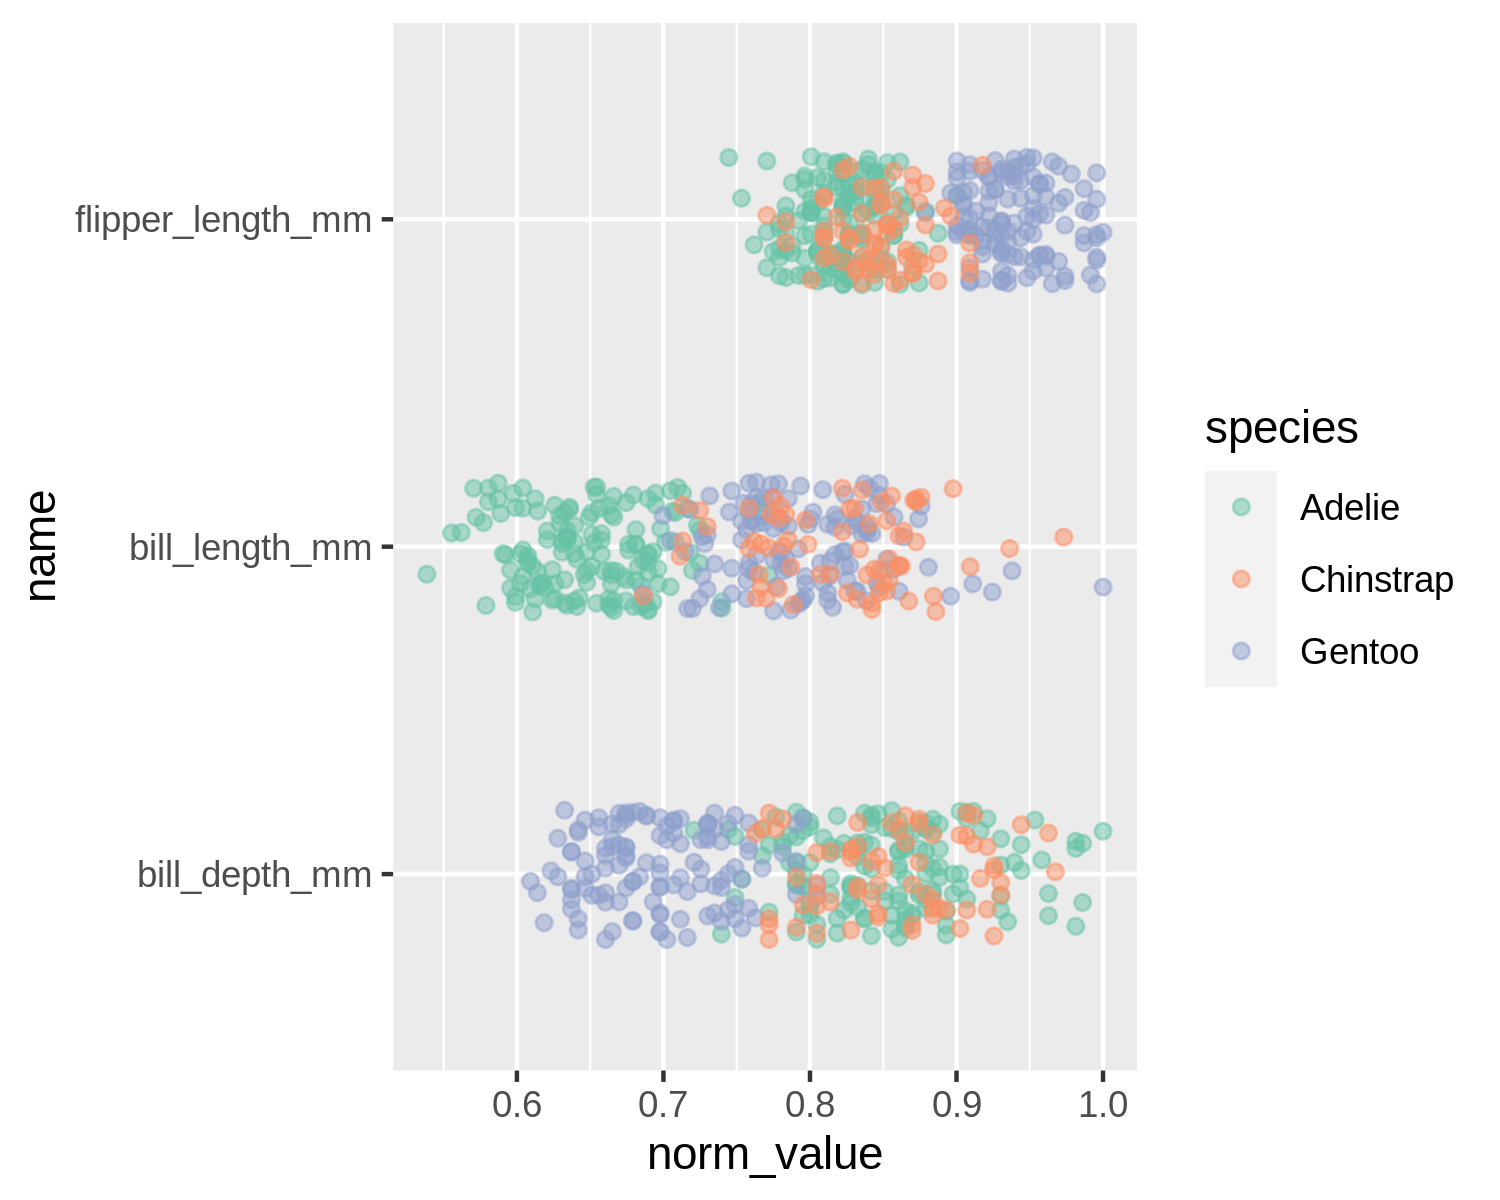

In [28]:
p = ggplot(penguins_long, aes(x = norm_value, y = name, color = species))

p = p + geom_point(position = position_jitter(w = 0, h = .2),
                      na.rm = TRUE, alpha = .5)

p = p + scale_color_brewer(palette = 'Set2')

p